In [3]:
from sklearn import datasets
import numpy as np
import os, sys
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  # from chapter_2 -> project root
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [7]:
def entropy(p):
    # - sum p(x) log p(x) for probability distribution
    # for binary classification probability distribution is [p, 1 - p]
    return - p * np.log2(p) - (1 - p) * np.log2(1 - p)

/tmp/ipykernel_162767/2490136612.py:4: RuntimeWarning: divide by zero encountered in log2
  return - p * np.log2(p) - (1 - p) * np.log2(1 - p)
/tmp/ipykernel_162767/2490136612.py:4: RuntimeWarning: invalid value encountered in scalar multiply
  return - p * np.log2(p) - (1 - p) * np.log2(1 - p)


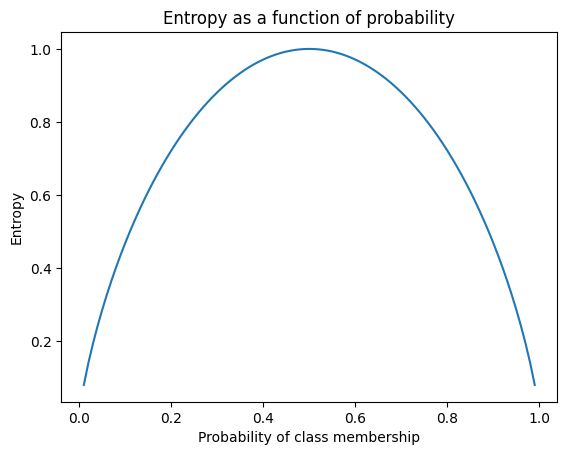

In [8]:
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) for p in x]
import matplotlib.pyplot as plt
plt.plot(x, ent)
plt.xlabel('Probability of class membership')
plt.ylabel('Entropy')
plt.title('Entropy as a function of probability')
plt.show()

In [9]:
def gini(p):
    # Gini impurity for binary classification
    return p * (1 - p) + (1 - p) * (1 - (1 - p))

def classification_error(p):
    # Classification error for binary classification
    return 1 - max(p, 1 - p)

/tmp/ipykernel_162767/2490136612.py:4: RuntimeWarning: divide by zero encountered in log2
  return - p * np.log2(p) - (1 - p) * np.log2(1 - p)
/tmp/ipykernel_162767/2490136612.py:4: RuntimeWarning: invalid value encountered in scalar multiply
  return - p * np.log2(p) - (1 - p) * np.log2(1 - p)


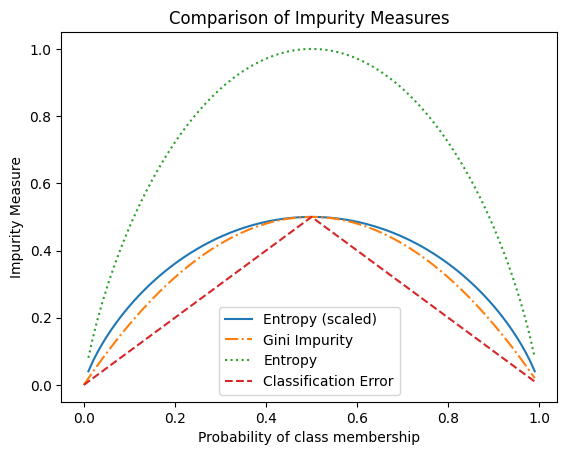

In [10]:
x = np.arange(0.0, 1.0, 0.01)
entropy_data = [entropy(p) for p in x]
scaled_entropy_data = [e * 0.5 for e in entropy_data]
classification_error_data = [classification_error(p) for p in x]
gini_data = [gini(p) for p in x]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, scaled_entropy_data, label='Entropy (scaled)')
ax.plot(x, gini_data, label='Gini Impurity', linestyle='-.')
ax.plot(x, entropy_data, label='Entropy', linestyle=':')
ax.plot(x, classification_error_data, label='Classification Error', linestyle='--')
ax.set_xlabel('Probability of class membership')
ax.set_ylabel('Impurity Measure')
ax.set_title('Comparison of Impurity Measures')
ax.legend()
plt.show()

In [11]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


/home/domin/learning/MachineLearningWithPytorch/visualization/visualization.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/home/domin/learning/MachineLearningWithPytorch/visualization/visualization.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[y_test == cl, 0],


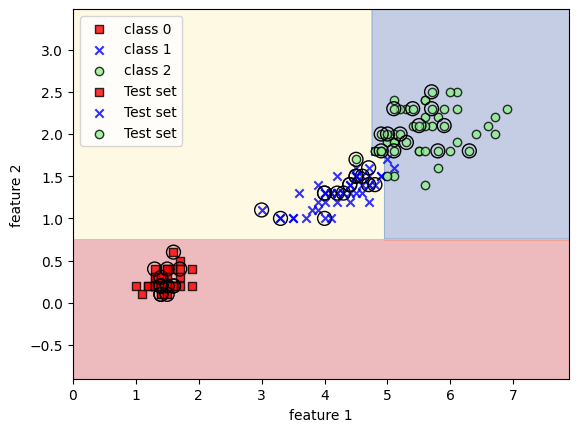

In [13]:
from visualization.visualization import plot_decision_regions, plot_data_universtal


plot_decision_regions(X_train, y_train, classifier=tree_model)
plot_data_universtal(X_train, y_train, X_test=X_test, y_test=y_test)

In [ ]:
# page 125